# Customer Segmentation

The project aims to identify customer types and create a customer segmentation. The data set contains several key demographical information of a registered customer base of a retail store, that also depicts their spending habits, purchases made in-store and online as well as using a catalogue, use of promotions, days since last activity as well as any complaints by them.  

Data obtained from : https://www.kaggle.com/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

Data reading and wrangling

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep ='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Drop unwanted columns and  rows with missing values for income

In [6]:
data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [7]:
from datetime import datetime
data['Dt_Customer'] = (pd.to_datetime('2017-01-01') - pd.to_datetime(data['Dt_Customer'])).dt.days 
# assuming data set available on 2017

In [8]:
data.rename(columns={'Dt_Customer':'Enrolled','Recency':'LastPurchase'},inplace=True)

In [9]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   Enrolled  LastPurchase  MntWines  ...  MntMeatProducts  MntFishProducts  \
0      1728            58       635  ...              546              172   
1       882            38        11  ...                6                2   
2      1229            26       426  ...              127              111   
3       822            26        11  ...               20               10   
4      1078            94       173  ...              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  
0                   10                  4                  7         0  
1                    1                  2                  5         0  
2                    2                 10                  4         0  
3                    0                  4                  6         0  
4                    3                  6                  5         0  

[5 rows x 21 columns]

Cleaning the data

In [10]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
#Replacing categories
data['Marital_Status'].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

In [12]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
#Replacing categories
data['Education'].replace({'Basic' : 'Undergrad','2n Cycle': 'Undergrad', 'Graduation':'Graduate'},inplace=True)

In [14]:
data['age'] = 2017 - data['Year_Birth'] 
#assuming the data set is obtained in 2017. 

In [15]:
#Combining kids and teens as children
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

In [16]:
data.head()

ID  Year_Birth Education Marital_Status   Income  Enrolled  LastPurchase  \
0  5524        1957  Graduate         Single  58138.0      1728            58   
1  2174        1954  Graduate         Single  46344.0       882            38   
2  4141        1965  Graduate       Together  71613.0      1229            26   
3  6182        1984  Graduate       Together  26646.0       822            26   
4  5324        1981       PhD        Married  58293.0      1078            94   

   MntWines  MntFruits  MntMeatProducts  ...  MntSweetProducts  MntGoldProds  \
0       635         88              546  ...                88            88   
1        11          1                6  ...                 1             6   
2       426         49              127  ...                21            42   
3        11          4               20  ...                 3             5   
4       173         43              118  ...                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Complain  age  Children  
0                  7         0   60         0  
1                  5         0   63         2  
2                  4         0   52         0  
3                  6         0   33         1  
4                  5         0   36         1  

[5 rows x 21 columns]

Visualize the data distributions and any outliers

In [17]:
cols = ['age', 'Education', 'Marital_Status', 'Income', 'Children',
       'Enrolled', 'LastPurchase', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

In [18]:
df = data[cols]

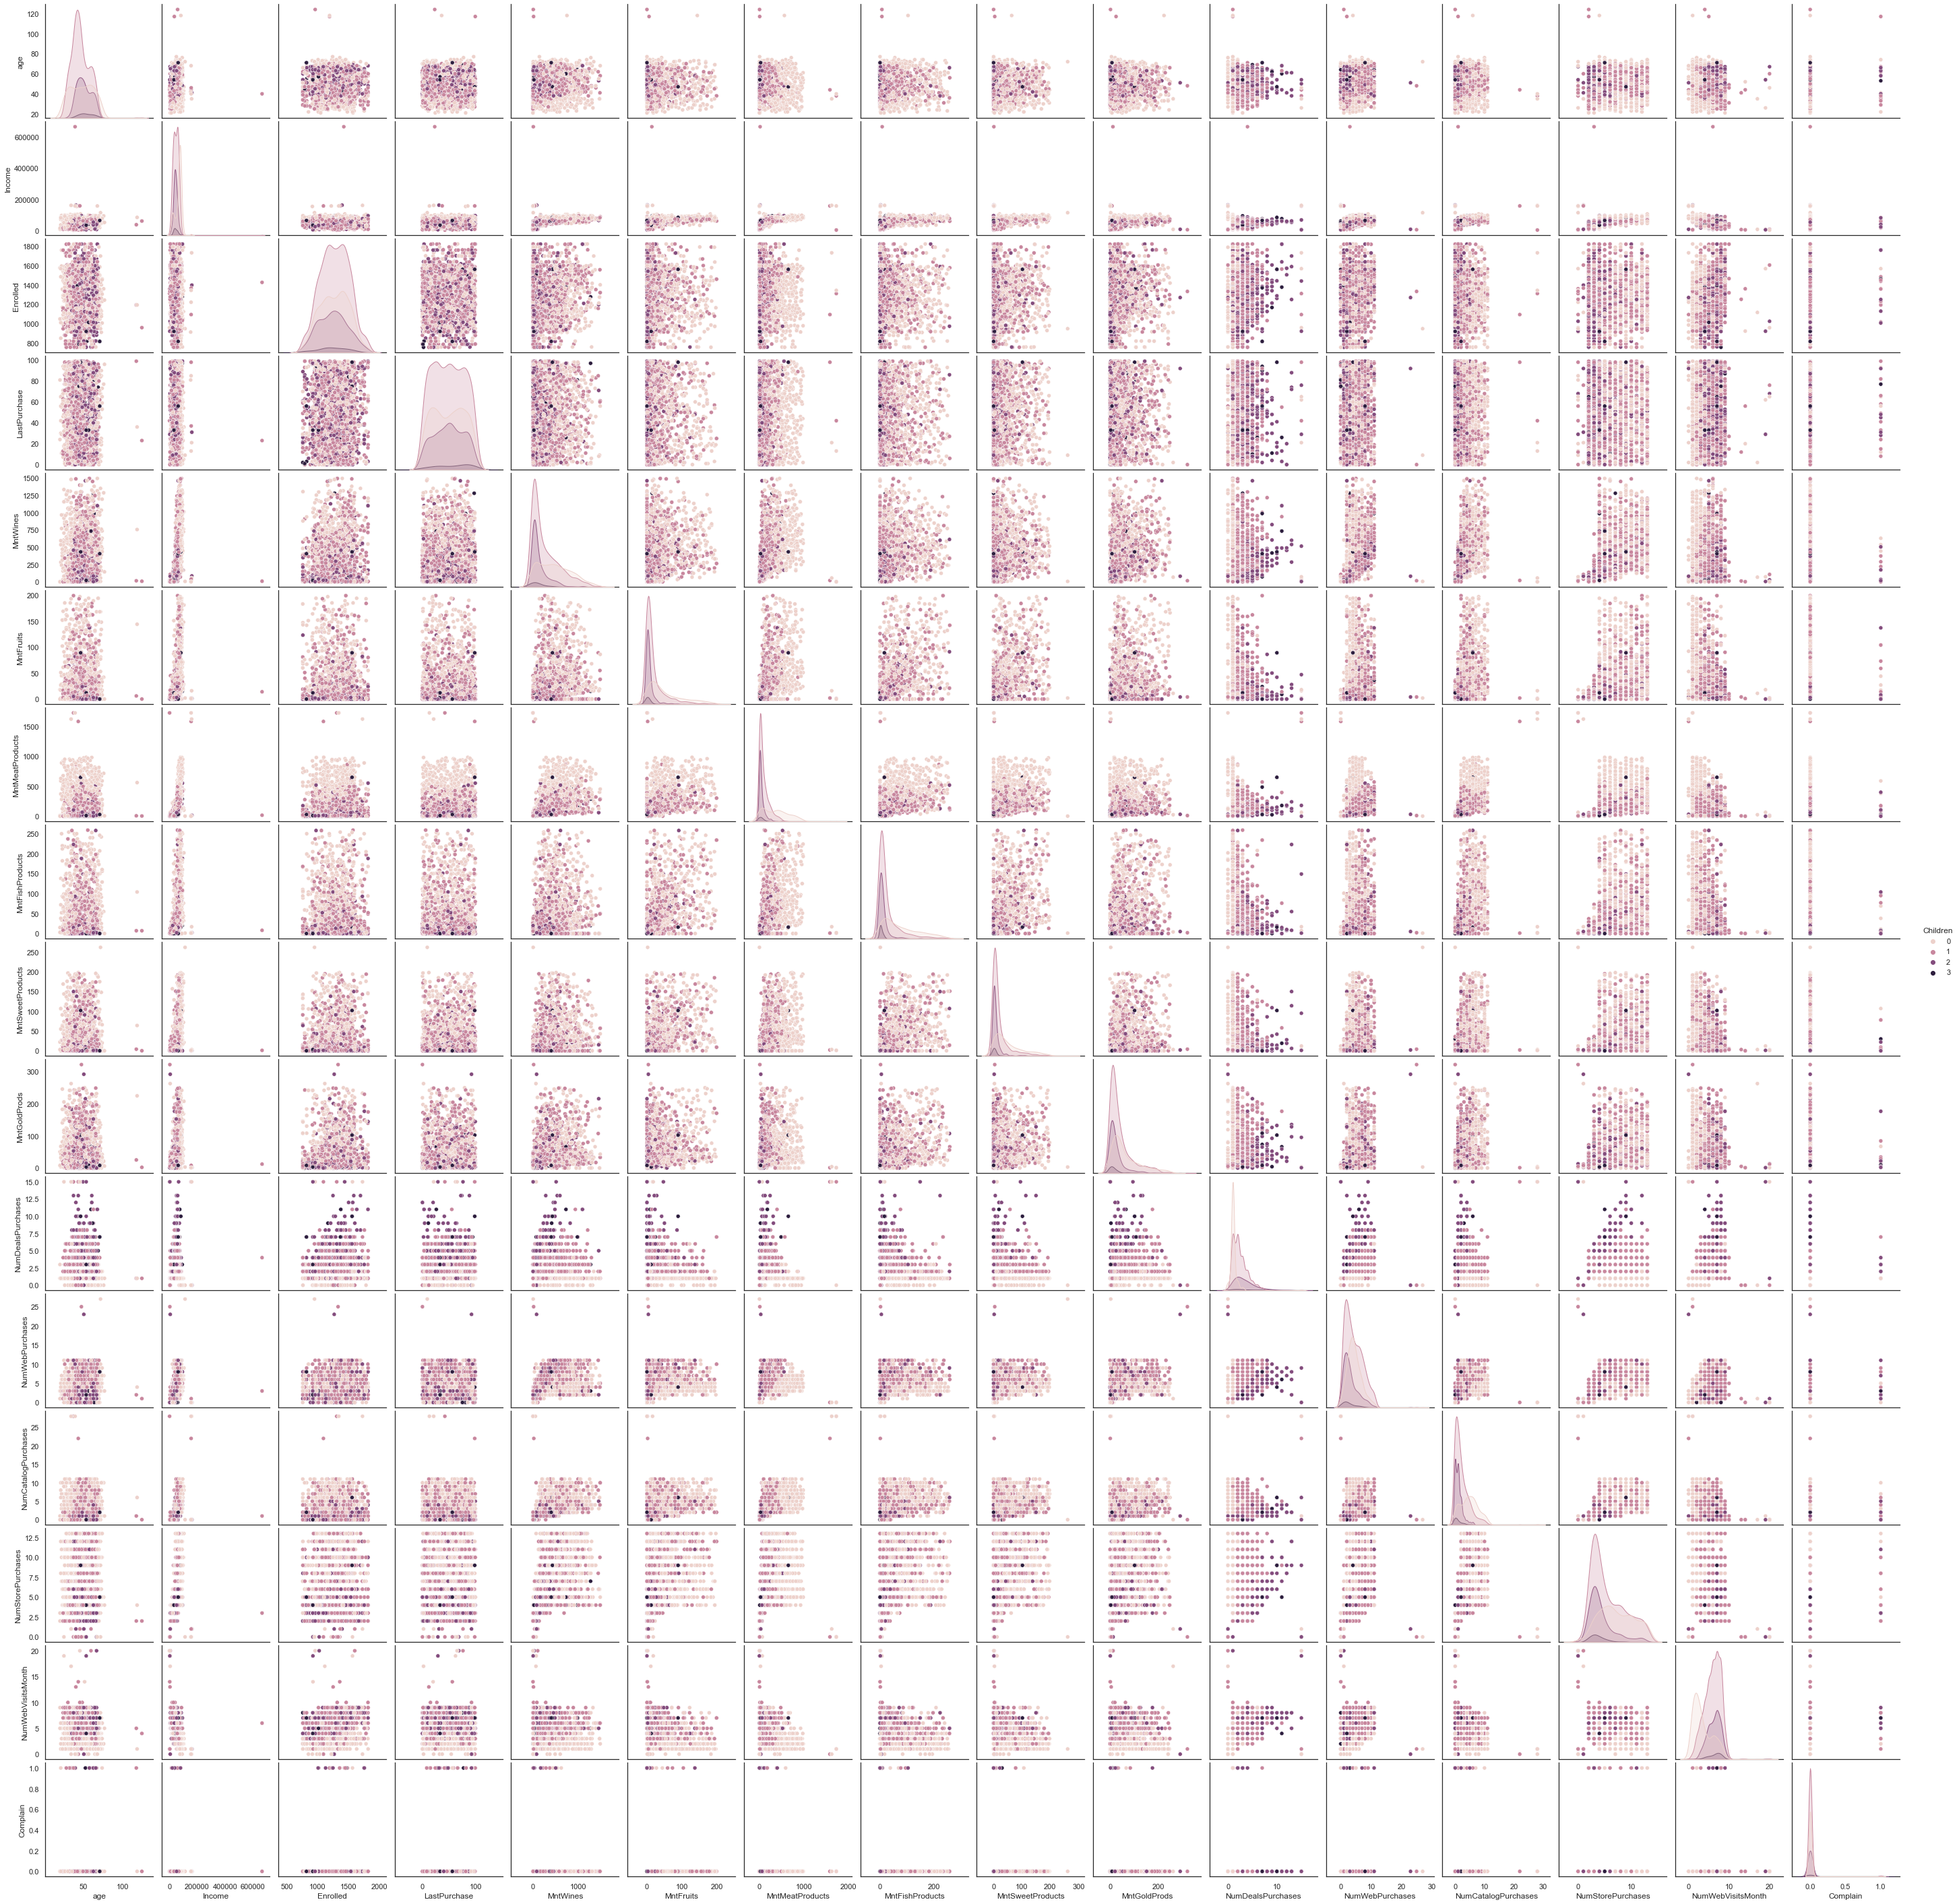

In [19]:
sns.pairplot(df , hue='Children')

From the plots, there can be seen some extream outliers. Hence They are removed

In [20]:
idx = df.loc[df['age']>80].index.tolist()
df.drop(axis=0, index=idx, inplace=True)

In [21]:
idx = df.loc[df['Income']> 200000].index.tolist()
df.drop(axis=0, index=idx, inplace=True)

## Examin Correlations between features

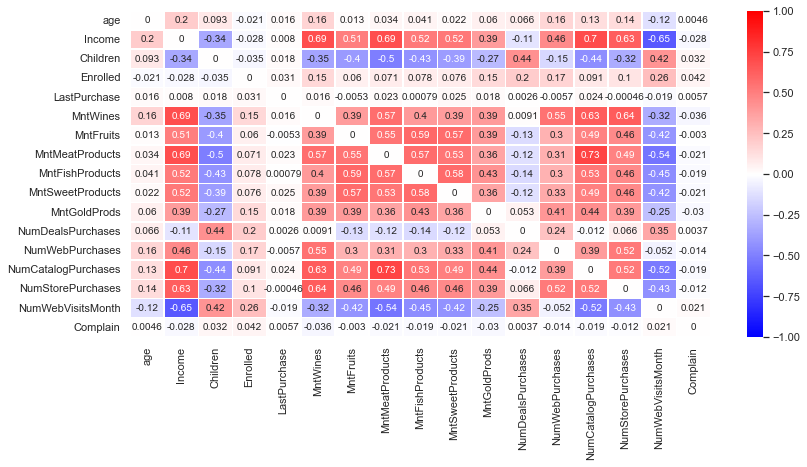

In [22]:
corr= df.corr()
for i in range(len(corr)):
    corr.iloc[i,i] = 0.0
    
plt.figure(figsize=(13, 6))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, linewidths=.5, cmap='bwr')


In [23]:
cols = corr.columns.tolist()
for i in range(0,len(corr)):
    for j in range(0,len(corr)):
        if( (j> i) & (abs(corr.iloc[i,j])>0.7)):
            print("{} - {} : HIGHLY {} CORRELATED , r={}".format(cols[i], cols[j], ("+ly" if (corr.iloc[i,j] >0) else "-ly"), corr.iloc[i,j]))
        elif((j> i) & (abs(corr.iloc[i,j])>0.5)):
            print("{} - {} : moderately {} correlated , r={}".format(cols[i], cols[j], ("+ly" if (corr.iloc[i,j] >0) else "-ly"), corr.iloc[i,j]))

            

Income - MntWines : moderately +ly correlated , r=0.688209275178229
Income - MntFruits : moderately +ly correlated , r=0.5073537927710582
Income - MntMeatProducts : moderately +ly correlated , r=0.6922787846267775
Income - MntFishProducts : moderately +ly correlated , r=0.52003977090427
Income - MntSweetProducts : moderately +ly correlated , r=0.5235985342505235
Income - NumCatalogPurchases : moderately +ly correlated , r=0.6965885653312804
Income - NumStorePurchases : moderately +ly correlated , r=0.6314244044191263
Income - NumWebVisitsMonth : moderately -ly correlated , r=-0.6502566956318309
Children - MntMeatProducts : moderately -ly correlated , r=-0.5041763150302168
MntWines - MntMeatProducts : moderately +ly correlated , r=0.5680807688447626
MntWines - NumWebPurchases : moderately +ly correlated , r=0.5536630702028235
MntWines - NumCatalogPurchases : moderately +ly correlated , r=0.6342367133656959
MntWines - NumStorePurchases : moderately +ly correlated , r=0.6402194422888708
M

### Examin skew

In [24]:
skew_columns = df.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

d:\miniconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Complain               10.380522
NumDealsPurchases       2.415185
MntFruits               2.103864
MntSweetProducts        2.102925
MntMeatProducts         2.027563
MntFishProducts         1.916558
NumCatalogPurchases     1.881523
MntGoldProds            1.837728
NumWebPurchases         1.195317
MntWines                1.170977
dtype: float64

#### Visualize Customer Demographics

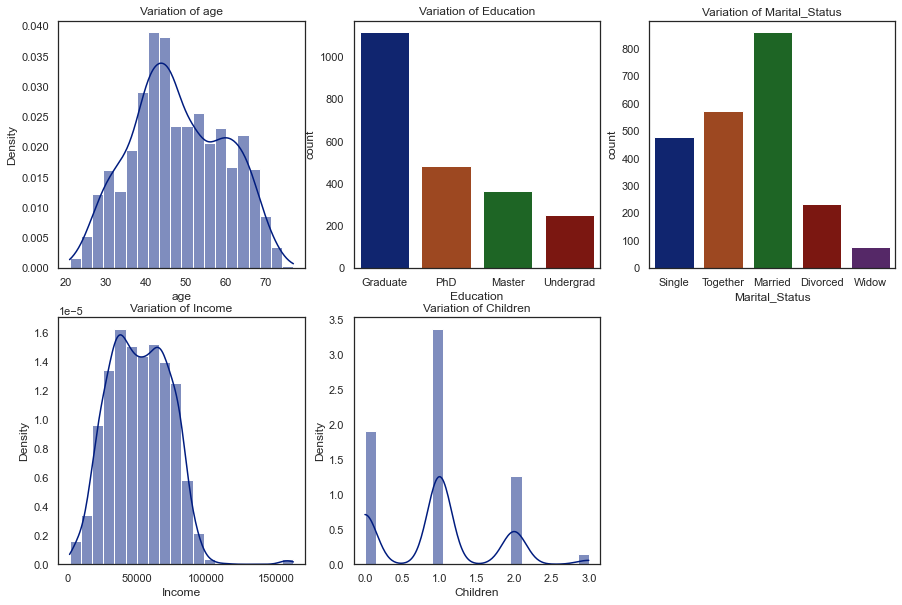

In [25]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['age','Education', 'Marital_Status', 'Income', 'Children']:
    n+=1
    plt.subplot(2,3,n)
    if(x in ['age','Income','Children']):
        sns.histplot(df[x], bins =20, kde=True, stat="density")
    else:
        sns.countplot(x = x, data=df )
    plt.title('Variation of {}'.format(x))
plt.show()

#### Customer spending patterns

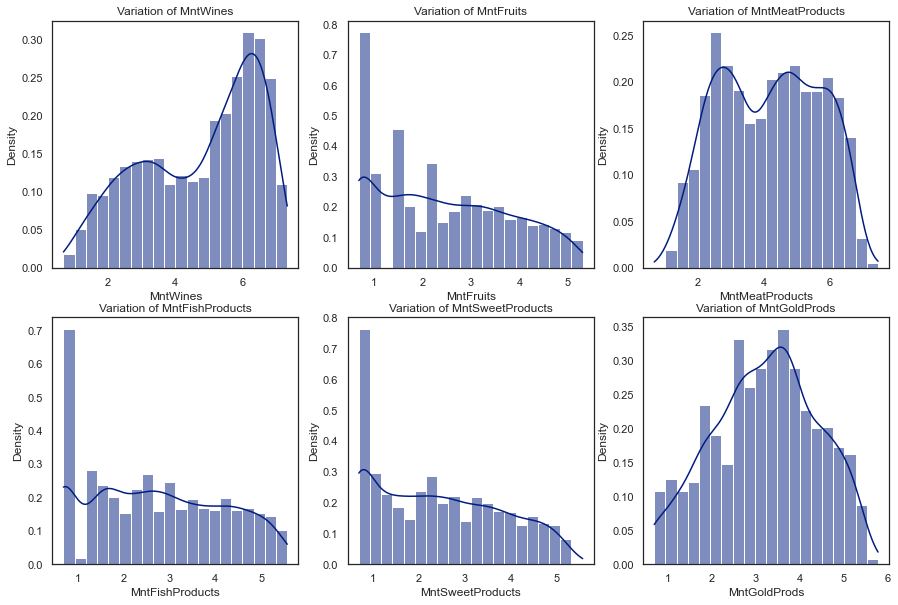

In [26]:
# Convert to log scale due to skew

plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    df[x] = df[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,3,n)
    sns.histplot(df[x], bins =20, kde=True, stat="density")
    plt.title('Variation of {}'.format(x))
                 
plt.show()

#### Customer use of delas and formats of purchase 

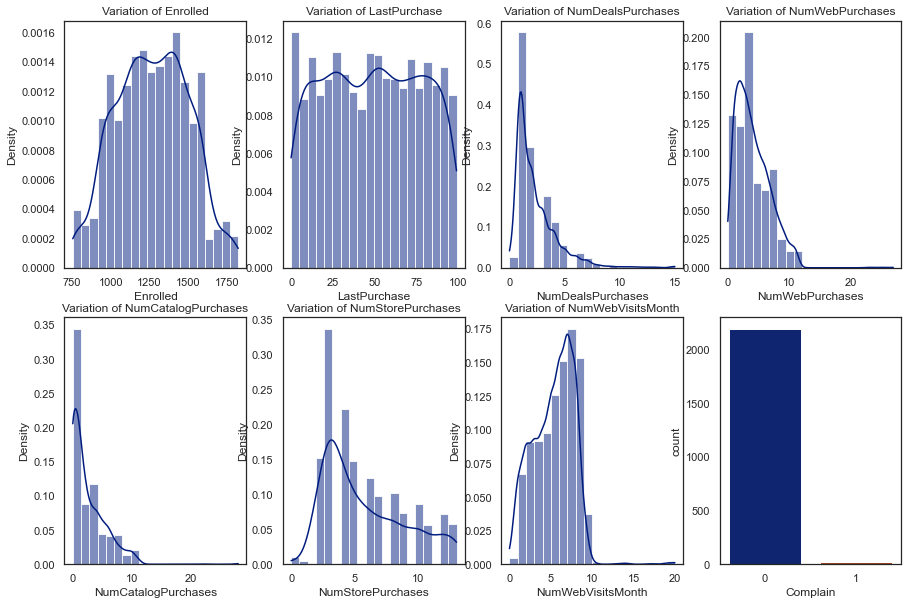

In [27]:
# Convert to log scale

plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'LastPurchase','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
#    df[x] = df[x].apply(lambda x: x+1).apply(np.log1p)
    plt.subplot(2,4,n)
    if(x =='Complain'):
        sns.countplot(x = x, data=df )
        continue
    sns.histplot(df[x], bins =20, kde=True, stat="density")
    

    plt.title('Variation of {}'.format(x))
                 
plt.show()

In [28]:
df.Complain.value_counts()

0    2192
1      20
Name: Complain, dtype: int64

## Apply clustering methods to segment the data

In [29]:
df.head()

age Education Marital_Status   Income  Children  Enrolled  LastPurchase  \
0   60  Graduate         Single  58138.0         0      1728            58   
1   63  Graduate         Single  46344.0         2       882            38   
2   52  Graduate       Together  71613.0         0      1229            26   
3   33  Graduate       Together  26646.0         1       822            26   
4   36       PhD        Married  58293.0         1      1078            94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  6.456770   4.499810         6.306275         5.159055          4.499810   
1  2.564949   1.098612         2.079442         1.386294          1.098612   
2  6.059123   3.931826         4.859812         4.727388          3.135494   
3  2.564949   1.791759         3.091042         2.484907          1.609438   
4  5.164786   3.806662         4.787492         3.871201          3.367296   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      4.499810                  3                8                   10   
1      2.079442                  2                1                    1   
2      3.784190                  1                8                    2   
3      1.945910                  2                2                    0   
4      2.833213                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  
0                  4                  7         0  
1                  2                  5         0  
2                 10                  4         0  
3                  4                  6         0  
4                  6                  5         0

In [30]:
cols = ['age','Income','Enrolled','LastPurchase','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
sc= StandardScaler()

df = pd.get_dummies(df, columns=['Education','Marital_Status'],drop_first=True)
df['Children'] = df[['Children']].apply(le.fit_transform)
df[cols] = sc.fit_transform(df[cols])

df.head()

age    Income  Children  Enrolled  LastPurchase  MntWines  MntFruits  \
0  1.018352  0.287105         0  1.973583      0.310353  0.997843   1.504674   
1  1.274785 -0.260882         2 -1.665144     -0.380813 -1.241570  -1.006978   
2  0.334530  0.913196         0 -0.172664     -0.795514  0.769031   1.085240   
3 -1.289547 -1.176114         1 -1.923210     -0.795514 -1.241570  -0.495116   
4 -1.033114  0.294307         1 -0.822130      1.554453  0.254416   0.992811   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumStorePurchases  \
0         1.412531         1.675361          1.481276  ...          -0.555814   
1        -1.388757        -0.925896         -0.995518  ...          -1.171160   
2         0.453904         1.377733          0.487764  ...           1.290224   
3        -0.718329        -0.168421         -0.623529  ...          -0.555814   
4         0.405974         0.787407          0.656565  ...           0.059532   

   NumWebVisitsMonth  Complain  Education_Master  Education_PhD  \
0           0.692181         0                 0              0   
1          -0.132545         0                 0              0   
2          -0.544908         0                 0              0   
3           0.279818         0                 0              0   
4          -0.132545         0                 0              1   

   Education_Undergrad  Marital_Status_Married  Marital_Status_Single  \
0                    0                       0                      1   
1                    0                       0                      1   
2                    0                       0                      0   
3                    0                       0                      0   
4                    0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  
0                        0                     0  
1                        0                     0  
2                        1                     0  
3                        1                     0  
4                        0                     0  

[5 rows x 24 columns]

### (1) K-means Clustering

d:\miniconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  f"KMeans is known to have a memory leak on Windows "


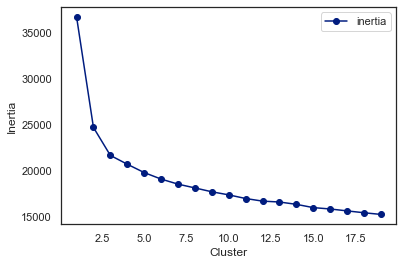

In [32]:
# Determine Cluster Size
km_list = list()
for clust in range(1,20):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df)
    km_list.append(pd.Series({'clusters': clust, 'inertia': km.inertia_, 'model': km}))

plot_data = (pd.concat(km_list, axis=1).T[['clusters','inertia']].set_index('clusters'))
ax = plot_data.plot(marker='o',ls='-')
ax.set(xlabel='Cluster', ylabel='Inertia');

In [33]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
df['Kmeans'] = km.fit_predict(df)

Text(0.5, 1.0, 'Scatter plot of age compared with Income')

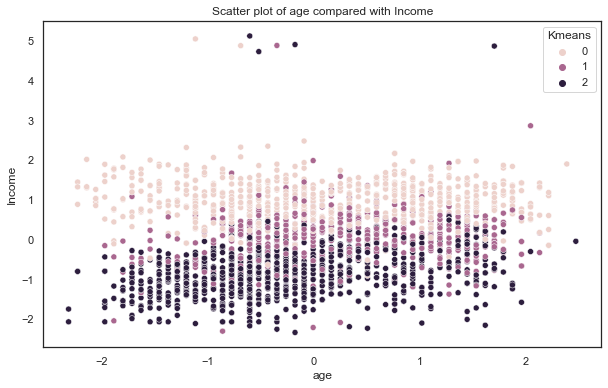

In [34]:
plt.figure(1, figsize= (10,6))
sns.scatterplot( data = df, x ='age', y='Income', hue = 'Kmeans')
plt.title('Scatter plot of age compared with Income')

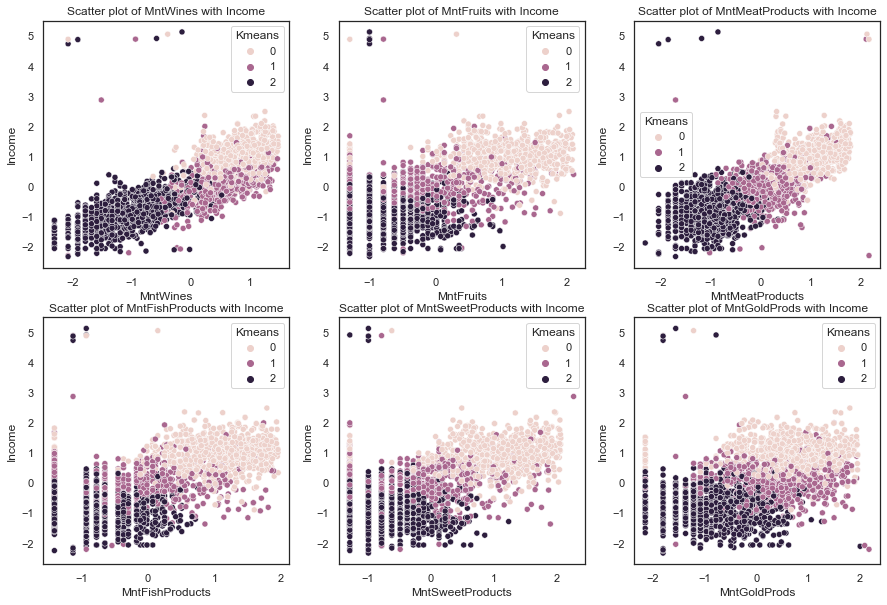

In [35]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Kmeans')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

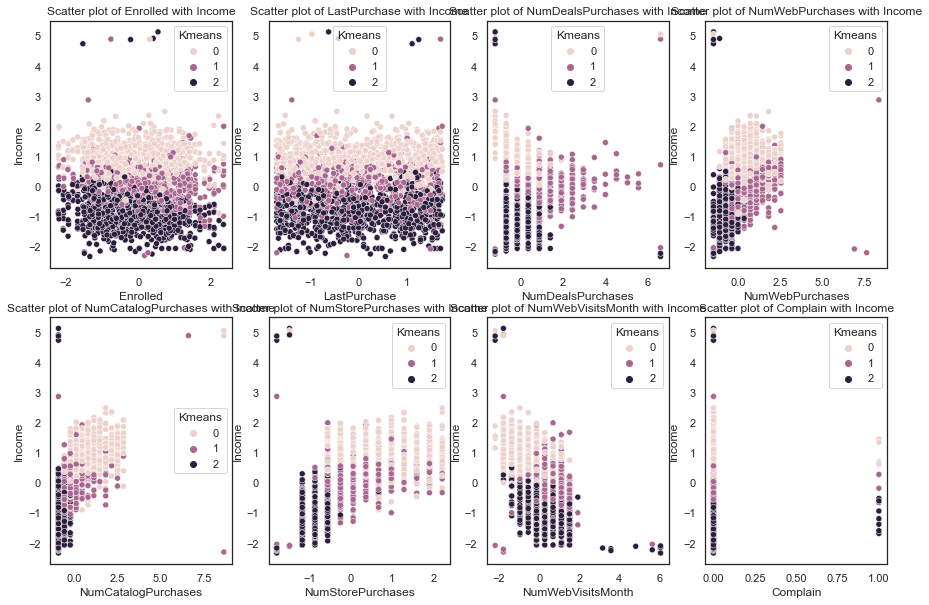

In [36]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'LastPurchase','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(2,4,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Kmeans')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

### (2) Heirarchical Agglomerative Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
df['Agglom'] = ag.fit_predict(df)
df.head()

age    Income  Children  Enrolled  LastPurchase  MntWines  MntFruits  \
0  1.018352  0.287105         0  1.973583      0.310353  0.997843   1.504674   
1  1.274785 -0.260882         2 -1.665144     -0.380813 -1.241570  -1.006978   
2  0.334530  0.913196         0 -0.172664     -0.795514  0.769031   1.085240   
3 -1.289547 -1.176114         1 -1.923210     -0.795514 -1.241570  -0.495116   
4 -1.033114  0.294307         1 -0.822130      1.554453  0.254416   0.992811   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0         1.412531         1.675361          1.481276  ...         0   
1        -1.388757        -0.925896         -0.995518  ...         0   
2         0.453904         1.377733          0.487764  ...         0   
3        -0.718329        -0.168421         -0.623529  ...         0   
4         0.405974         0.787407          0.656565  ...         0   

   Education_Master  Education_PhD  Education_Undergrad  \
0                 0              0                    0   
1                 0              0                    0   
2                 0              0                    0   
3                 0              0                    0   
4                 0              1                    0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Kmeans  Agglom  
0                     0       0       2  
1                     0       2       0  
2                     0       0       2  
3                     0       2       0  
4                     0       1       1  

[5 rows x 26 columns]

Text(0.5, 1.0, 'Scatter plot of age compared with Income')

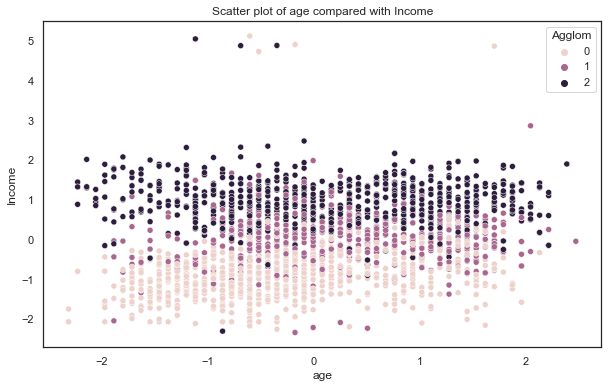

In [38]:
plt.figure(1, figsize= (10,6))
sns.scatterplot( data = df, x ='age', y='Income', hue = 'Agglom')
plt.title('Scatter plot of age compared with Income')

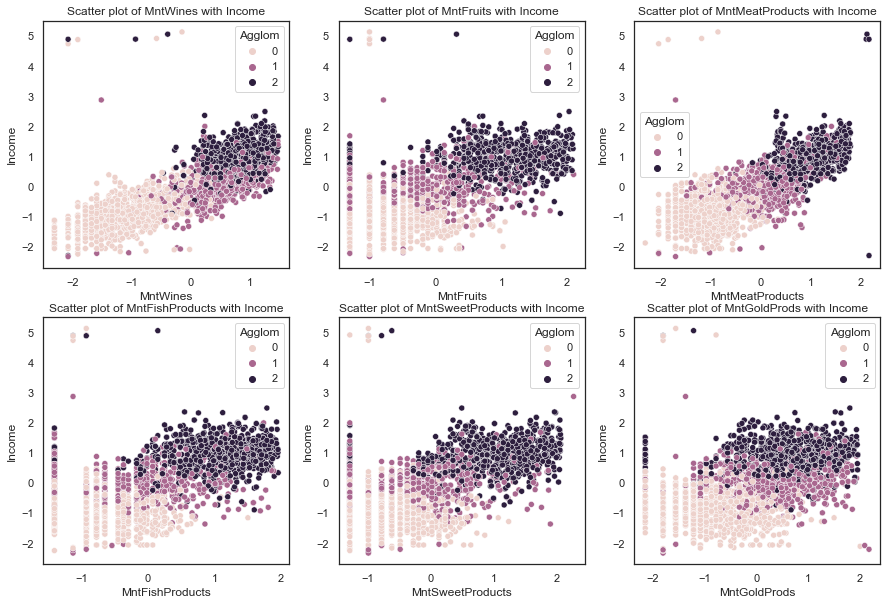

In [39]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]:
    n+=1
    plt.subplot(2,3,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Agglom')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

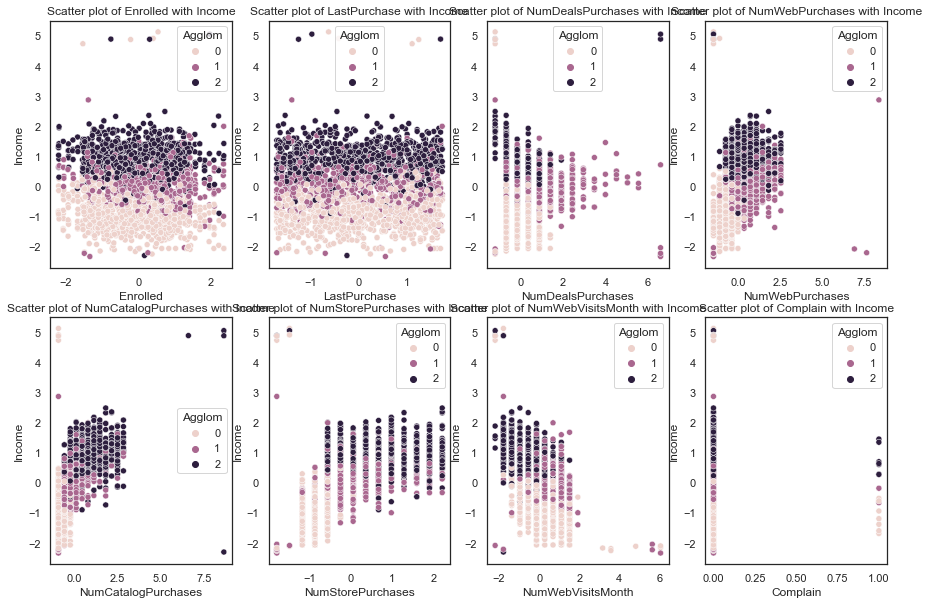

In [40]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'LastPurchase','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(2,4,n)
    sns.scatterplot( data = df, x =x, y='Income', hue = 'Agglom')
    plt.title('Scatter plot of {} with Income'.format(x))
                 
plt.show()

#### Inverse scaling

In [41]:
df1 = df.copy()

In [42]:
df[cols] = sc.inverse_transform(df[cols])
df.head()

age   Income  Children  Enrolled  LastPurchase  MntWines  MntFruits  \
0  60.0  58138.0         0    1728.0          58.0  6.456770   4.499810   
1  63.0  46344.0         2     882.0          38.0  2.564949   1.098612   
2  52.0  71613.0         0    1229.0          26.0  6.059123   3.931826   
3  33.0  26646.0         1     822.0          26.0  2.564949   1.791759   
4  36.0  58293.0         1    1078.0          94.0  5.164786   3.806662   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0         6.306275         5.159055          4.499810  ...         0   
1         2.079442         1.386294          1.098612  ...         0   
2         4.859812         4.727388          3.135494  ...         0   
3         3.091042         2.484907          1.609438  ...         0   
4         4.787492         3.871201          3.367296  ...         0   

   Education_Master  Education_PhD  Education_Undergrad  \
0                 0              0                    0   
1                 0              0                    0   
2                 0              0                    0   
3                 0              0                    0   
4                 0              1                    0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Kmeans  Agglom  
0                     0       0       2  
1                     0       2       0  
2                     0       0       2  
3                     0       2       0  
4                     0       1       1  

[5 rows x 26 columns]

In [43]:
#df['dummy_Master', 'dummy_PhD', 'dummy_Undergrad','dummy_Married', 'dummy_Single', 'dummy_Together','dummy_Widow']
df['Education'] = df[['Education_Master', 'Education_PhD', 'Education_Undergrad']].idxmax(axis=1)
df['Marital_Status'] = df[['Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together','Marital_Status_Widow']].idxmax(axis=1)


In [44]:
df.drop(['Education_Master', 'Education_PhD', 'Education_Undergrad'], axis=1,inplace=True)
df.drop(['Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together','Marital_Status_Widow'], axis=1,inplace=True)

In [45]:
df.head()

age   Income  Children  Enrolled  LastPurchase  MntWines  MntFruits  \
0  60.0  58138.0         0    1728.0          58.0  6.456770   4.499810   
1  63.0  46344.0         2     882.0          38.0  2.564949   1.098612   
2  52.0  71613.0         0    1229.0          26.0  6.059123   3.931826   
3  33.0  26646.0         1     822.0          26.0  2.564949   1.791759   
4  36.0  58293.0         1    1078.0          94.0  5.164786   3.806662   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumDealsPurchases  \
0         6.306275         5.159055          4.499810  ...                3.0   
1         2.079442         1.386294          1.098612  ...                2.0   
2         4.859812         4.727388          3.135494  ...                1.0   
3         3.091042         2.484907          1.609438  ...                2.0   
4         4.787492         3.871201          3.367296  ...                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Complain  Kmeans  Agglom         Education           Marital_Status  
0         0       0       2  Education_Master    Marital_Status_Single  
1         0       2       0  Education_Master    Marital_Status_Single  
2         0       0       2  Education_Master  Marital_Status_Together  
3         0       2       0  Education_Master  Marital_Status_Together  
4         0       1       1     Education_PhD   Marital_Status_Married  

[5 rows x 21 columns]

### Comparing the Clustering Methods to find unique features among the customers within the clusters

In [46]:
df.groupby(['Kmeans','Agglom']).agg({'age':'count'})

age
Kmeans Agglom     
0      1        25
       2       713
1      0        17
       1       520
       2        42
2      0       851
       1        44

From these observations, considering the counts, we can see that Kemans and Agglom can be mapped as follows :

|Kmeans | Agglom |
| --|--|
| 0 | 1 | 
| 1 | 0 |
| 2 | 2 |

In [47]:
cluster1 = df.loc[(df['Kmeans'] ==0) & (df['Agglom'] ==1)]
cluster2 = df.loc[(df['Kmeans'] ==1) & (df['Agglom'] ==0)]
cluster3 = df.loc[(df['Kmeans'] ==2) & (df['Agglom'] ==2)]

In [48]:
df["Cluster"] = "Other"
df.loc[(df['Kmeans'] ==0) & (df['Agglom'] ==1),"Cluster"] = "Cluster 1"
df.loc[(df['Kmeans'] ==1) & (df['Agglom'] ==0),"Cluster"] = "Cluster 2"
df.loc[(df['Kmeans'] ==2) & (df['Agglom'] ==2),"Cluster"] = "Cluster 3"

In [49]:
df

age   Income  Children  Enrolled  LastPurchase  MntWines  MntFruits  \
0     60.0  58138.0         0    1728.0          58.0  6.456770   4.499810   
1     63.0  46344.0         2     882.0          38.0  2.564949   1.098612   
2     52.0  71613.0         0    1229.0          26.0  6.059123   3.931826   
3     33.0  26646.0         1     822.0          26.0  2.564949   1.791759   
4     36.0  58293.0         1    1078.0          94.0  5.164786   3.806662   
...    ...      ...       ...       ...           ...       ...        ...   
2235  50.0  61223.0         1    1298.0          46.0  6.566672   3.806662   
2236  71.0  64014.0         3     818.0          56.0  6.011267   0.693147   
2237  36.0  56981.0         0    1072.0          91.0  6.813445   3.912023   
2238  61.0  69245.0         1    1073.0           8.0  6.063785   3.465736   
2239  63.0  52869.0         2    1539.0          40.0  4.454347   1.609438   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0            6.306275         5.159055          4.499810  ...   
1            2.079442         1.386294          1.098612  ...   
2            4.859812         4.727388          3.135494  ...   
3            3.091042         2.484907          1.609438  ...   
4            4.787492         3.871201          3.367296  ...   
...               ...              ...               ...  ...   
2235         5.214936         3.784190          4.787492  ...   
2236         3.465736         0.693147          0.693147  ...   
2237         5.389072         3.526361          2.639057  ...   
2238         5.375278         4.406719          3.465736  ...   
2239         4.143135         1.386294          1.098612  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 8.0                 10.0                4.0   
1                 1.0                  1.0                2.0   
2                 8.0                  2.0               10.0   
3                 2.0                  0.0                4.0   
4                 5.0                  3.0                6.0   
...               ...                  ...                ...   
2235              9.0                  3.0                4.0   
2236              8.0                  2.0                5.0   
2237              2.0                  3.0               13.0   
2238              6.0                  5.0               10.0   
2239              3.0                  1.0                4.0   

      NumWebVisitsMonth  Complain  Kmeans  Agglom         Education  \
0                   7.0         0       0       2  Education_Master   
1                   5.0         0       2       0  Education_Master   
2                   4.0         0       0       2  Education_Master   
3                   6.0         0       2       0  Education_Master   
4                   5.0         0       1       1     Education_PhD   
...                 ...       ...     ...     ...               ...   
2235                5.0         0       0       2  Education_Master   
2236                7.0         0       1       1     Education_PhD   
2237                6.0         0       0       2  Education_Master   
2238                3.0         0       0       2  Education_Master   
2239                7.0         0       1       0     Education_PhD   

               Marital_Status    Cluster  
0       Marital_Status_Single      Other  
1       Marital_Status_Single      Other  
2     Marital_Status_Together      Other  
3     Marital_Status_Together      Other  
4      Marital_Status_Married      Other  
...                       ...        ...  
2235   Marital_Status_Married      Other  
2236  Marital_Status_Together      Other  
2237   Marital_Status_Married      Other  
2238  Marital_Status_Together      Other  
2239   Marital_Status_Married  Cluster 2  

[2212 rows x 22 columns]

### Visualize based on Clusters

Text(0.5, 1.0, 'Swarm plot of age with Clusters')

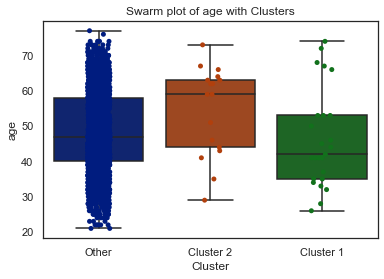

In [50]:
#Analyze Age of customers according to clusters

sns.stripplot(x='Cluster', y='age', data=df)
sns.boxplot(x='Cluster', y='age', data=df)
plt.title('Swarm plot of age with Clusters')

Text(0.5, 1.0, 'Swarm plot of Income with Clusters')

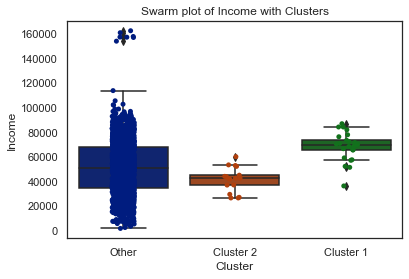

In [51]:
#Analyze income of customers according to clusters
sns.stripplot(x='Cluster', y='Income', data=df)
sns.boxplot(x='Cluster', y='Income', data=df)
plt.title('Swarm plot of Income with Clusters')

In [52]:
# df['totSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
# sns.stripplot(x='Cluster', y='totSpent', data=df)
# sns.boxplot(x='Cluster', y='totSpent', data=df)
# plt.title('Swarm plot of total spent with Clusters')

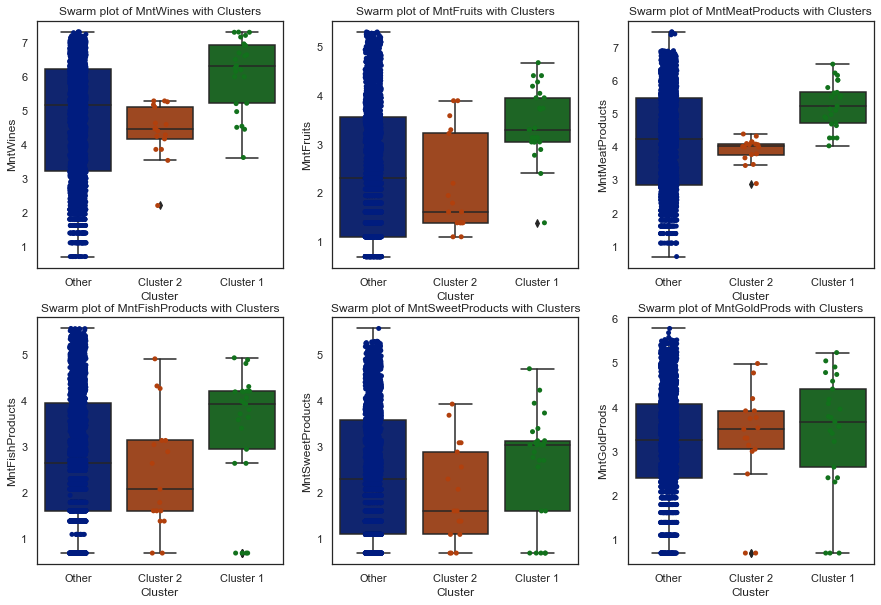

In [53]:
#Analyze Purchases of customers based on clusters 

plt.figure(1, figsize= (15,10))
n=0
for x in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    n+=1
    plt.subplot(2,3,n)
    sns.stripplot(x='Cluster', y=x, data=df)
    sns.boxplot(x='Cluster', y=x, data=df)
    plt.title('Swarm plot of {} with Clusters'.format(x))                 
plt.show()

Text(0.5, 1.0, 'Bar plot of Clusters with Children Info')

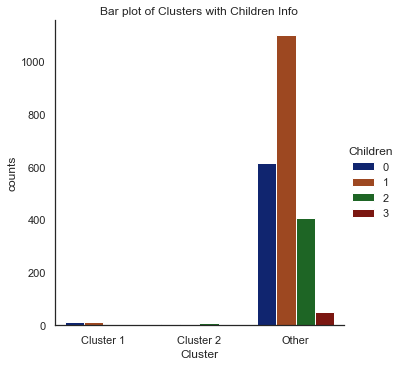

In [54]:

df1 = df[['Cluster','age','Children']]
df1 = df1.groupby(['Cluster','Children']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Cluster',y='counts', hue='Children', kind ='bar')
plt.title('Bar plot of Clusters with Children Info')

Text(0.5, 1.0, 'Bar plot of Clusters with Marital_Status Info')

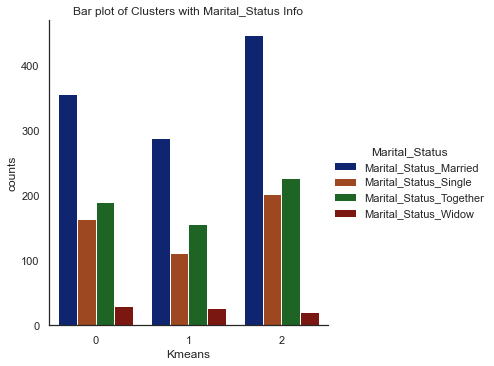

In [55]:
#df1 = df[['Kmeans','age','Children','Marital_Status','Education']]
df1 = df[['Kmeans','age','Marital_Status']]
df1 = df1.groupby(['Kmeans','Marital_Status']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Kmeans',y='counts', hue='Marital_Status', kind ='bar')
plt.title('Bar plot of Clusters with Marital_Status Info') 

Text(0.5, 1.0, 'Bar plot of Clusters with Education Info')

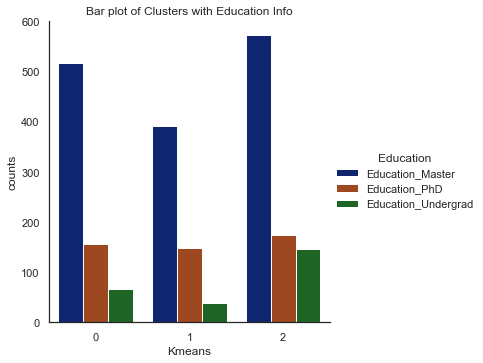

In [56]:
#df1 = df[['Kmeans','age','Children','Marital_Status','Education']]
df1 = df[['Kmeans','age','Education']]
df1 = df1.groupby(['Kmeans','Education']).agg('count').reset_index()
df1.rename(columns={'age':'counts'},inplace=True)
df1
sns.catplot(data= df1, x='Kmeans',y='counts', hue='Education', kind ='bar')
plt.title('Bar plot of Clusters with Education Info') 

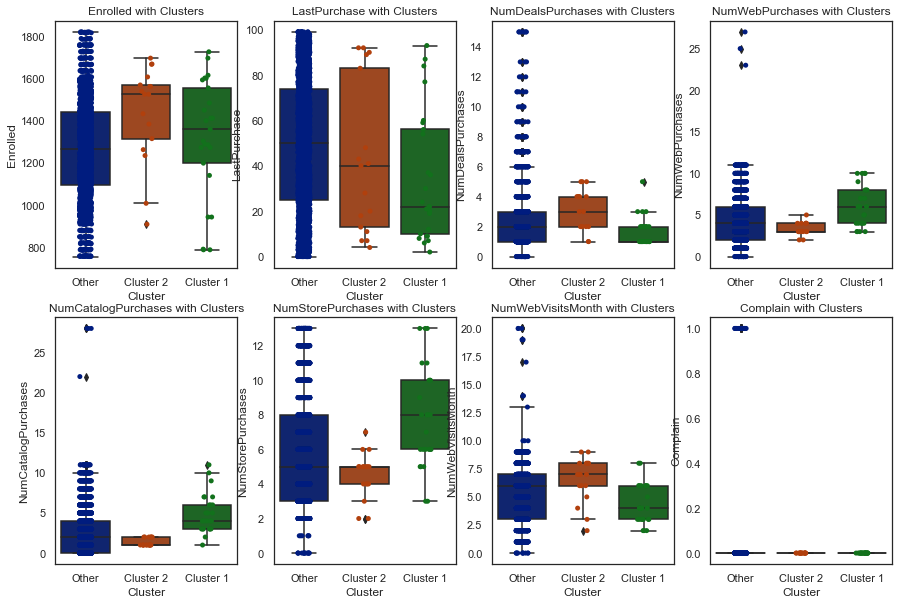

In [57]:
plt.figure(1, figsize= (15,10))
n=0
for x in ['Enrolled', 'LastPurchase','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'Complain' ]:
    n+=1
    plt.subplot(2,4,n)
    sns.stripplot(x='Cluster', y=x, data=df)
    sns.boxplot(x='Cluster', y=x, data=df)
    plt.title('{} with Clusters'.format(x))                 
plt.show()

## Positioning the clusters and conclusions

From these results, it can be seen that the three clusters created have the following featuers. 

| Cluster         | Behaviour |
| -------- | ----------|
| cluster 1| Higherst earners and spenders.  Average age, and the cluster with the least number of children. Highest Number of Catalogue and Instore Purchases, while lowerst cluster to conduct web visits|
| cluster 2 | Lowest age group among the clusters, and lowerst earners and spenders. Have more childeren compared to other clusters. Looks like regular shoppers as the days since last purchase day is low|
| cluster 3 | Cluster with the olderst demography. Shows the heighst amount of deal users.|
